In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [37]:
# Biom table information
# samples were processed on the custom 986 cMAG database using sourmash 51 mer for species ID
# Datasets included: Qiita study ID: 15947 (artifact 18319: PB Hifi seqwell data)
    # Qiita study ID: 15889 seqwell expanded dataset (artifacts: 18322, 18323, 18324, 18325, 18326, 18327)
    # samples were merged on the basis of sample_name as many of the samples from seqwell were technical duplicates
    # note, a total of 24 samples (6 timepoint across 4 participants: 526, 549, 791, and 798 were included as tech reps and are indicated in the sheet as duplicate_tech=1 or 2)
# A combined analysis of the two datasets was completed (Qiita Analysis ID: 69753)
# Samples were filtered as follows: retain samples with 1 or more features, remove one of the technical duplicates across the sample set to ensure ML isnt artificially inflated based on a tech rep, exclude positive control samples, )

# sample sets were rarified with replacement to 100,000,000 (~100Mbp)

# LAZ stunting: 201 total (0=non stunted ==110; 1=stunted ==91)
# Linear growth: 131 total (remove mixed) (0=bad or poor linear growth ==82; 1=good linear growth ==49)

In [38]:
#####################################

## Evaluate linear growth
# PAV



In [ ]:
### PAV (linear growth)
## Beta diversity analysis
# original biom table needs to be transformed so that samples are rows and features are columns...and the end includes metadata categories
# Load microbiome feature data (e.g., OTU table)
# <r100M_PAV_216962_taxa_trans.csv> this biom table has metadata at the end of the feature table to enable subsampling
# Note, for biom table, ensure sample name is same from mapping file (may need to remove prefix)
otu_table4 = pd.read_csv("Table_S21_r100M_PAV_216962_taxa_trans.csv", index_col=0)

# Note for metadata, need to 1) change sample_name to sample_id in metadata 2) remove any samples in metadata which are not included in analysis

# Load metadata with the target variable
metadata4 = pd.read_csv("Table_S20_r100M_metadata.csv")


In [40]:
# subsample table to only include samples with clear good or bad linear growth (exclude mixed signal)
otu_table_lg2=otu_table4.loc[otu_table4['linear_growth']!='mixed']
otu_table_lg2.shape
otu_table_lg2.head()

,s__14-2 sp902463835,s__14-2 sp934434905,s__Acetatifactor acetigignens,s__Acetatifactor intestinalis,s__Acetatifactor sp003447295,s__Acetatifactor sp900066565,s__Acetatifactor sp900554205,s__Acetatifactor sp900755865,s__Acetatifactor sp900760705,s__Acetatifactor sp900766575,...,s__sapiens HG03453,unclassified,id,breastfed,hsid,linear_growth,laz_stunting_bool,linear_growth_num,site_village,collection_week
sample_id,,,,,,,,,,,,,,,,,,,,,
15889.500.FB00259114,0,0,0,0,0,1,0,0,0,0,...,0,1,15889.500.FB00259114,1,500,good,1,1,Limera,24
15889.500.FB00862515,0,0,0,1,0,0,0,0,0,0,...,0,1,15889.500.FB00862515,1,500,good,1,1,Limera,0
15889.500.FB00929809,0,0,0,0,0,0,1,0,0,0,...,0,1,15889.500.FB00929809,1,500,good,1,1,Limera,36
15889.500.FB00935447,0,0,1,0,1,0,0,0,0,0,...,0,1,15889.500.FB00935447,1,500,good,1,1,Limera,48
15889.510.FB00267791,0,0,0,1,1,1,0,0,0,0,...,0,1,15889.510.FB00267791,0,510,bad,0,0,Limera,24


In [41]:
# subsample the metadata table as well to exclude mixed linear growth samples
metadata_lg2=metadata4.loc[metadata4['linear_growth']!='mixed']
metadata_lg2.tail()

,sample_id,platform,run_date,center_project_name,run_center,index,instrument_model,sequencing_meth,experiment_design_description,library_construction_protocol,...,host_common_name,host_age_units,muac_cm,age_days,site_village,host_age,qiita_study_title,qiita_study_alias,linear_growth,linear_growth_num
126,15889.556.FB00941809,Pacbio,2/5/25,longplex r2,Pacbio Apps lab,PB.G1_seqwell_set3_C01,RevioSPRQ,SMRTBell3.0,96 samples per smartcell,seqwell longplex fragment and tagmentation,...,humans,months,14.4,850,Limera,19.64,Seqwell LR-MG EED study (TAXA),TBD,good,1
127,15889.804.FB00855218,Pacbio,2/5/25,longplex r2,Pacbio Apps lab,PB.G1_seqwell_set3_B06,RevioSPRQ,SMRTBell3.0,96 samples per smartcell,seqwell longplex fragment and tagmentation,...,humans,months,13.4,577,Masenjere,13.43,Seqwell LR-MG EED study (TAXA),TBD,good,1
128,15889.641.FB00258801,Pacbio,2/5/25,longplex r2,Pacbio Apps lab,PB.G1_seqwell_set3_A05,RevioSPRQ,SMRTBell3.0,96 samples per smartcell,seqwell longplex fragment and tagmentation,...,humans,months,13.6,618,Limera,17.50,Seqwell LR-MG EED study (TAXA),TBD,good,1
129,15889.526.FB00935408,Pacbio,2/5/25,longplex r2,Pacbio Apps lab,PB.G1_seqwell_set3_F08,RevioSPRQ,SMRTBell3.0,96 samples per smartcell,seqwell longplex fragment and tagmentation,...,humans,months,16.5,1043,NaN,34.27,Seqwell LR-MG EED study (TAXA),TBD,good,1
130,15889.798.FB00942219,Pacbio,2/5/25,longplex r2,Pacbio Apps lab,PB.G1_seqwell_set3_E10,RevioSPRQ,SMRTBell3.0,96 samples per smartcell,seqwell longplex fragment and tagmentation,...,humans,months,16.6,691,NaN,22.70,Seqwell LR-MG EED study (TAXA),TBD,good,1


In [42]:
# Ensure rows (samples) align in both datasets
otu_table_lg2 = otu_table_lg2.loc[metadata_lg2['sample_id']]

In [43]:
## Analysis for full biom table (includes samples run on HiFi only with Smartbell along with samples run with seqwell)
# Remove the All columns at the end of OTU 
otu_dr4=otu_table_lg2.drop(['id','breastfed','hsid', 'linear_growth', 'laz_stunting_bool', 'linear_growth_num', 'site_village', 'collection_week'], axis=1)
otu_dr4.head()

,s__14-2 sp902463835,s__14-2 sp934434905,s__Acetatifactor acetigignens,s__Acetatifactor intestinalis,s__Acetatifactor sp003447295,s__Acetatifactor sp900066565,s__Acetatifactor sp900554205,s__Acetatifactor sp900755865,s__Acetatifactor sp900760705,s__Acetatifactor sp900766575,...,s__Zag111 sp004558955,s__Zag111_genus_unkn_species,s__Zhenhengia yiwuensis,s__Zongyangia gallinarum,s__sapiens HG01123,s__sapiens HG02717,s__sapiens HG02723,s__sapiens HG02886,s__sapiens HG03453,unclassified
sample_id,,,,,,,,,,,,,,,,,,,,,
15947.PB.E5,0,0,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
15947.PB.C5,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
15947.PB.E1,0,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
15947.PB.C3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15947.PB.C6,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Ensure the data type is numeric
metadata_lg2['linear_growth_num'].dtype

#if not a numeric, force it to be one
metadata_lg2['linear_growth_num'] = pd.to_numeric(metadata_lg2['linear_growth_num'])

metadata_lg2['linear_growth_num'].dtype

/Users/jminich/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


dtype('int64')

In [45]:
# subsample this dataset to only include the encoded variable and sample_id
metadata_lg2b=metadata_lg2[['sample_id', 'linear_growth_num']]
metadata_lg2b.tail()

,sample_id,linear_growth_num
126,15889.556.FB00941809,1
127,15889.804.FB00855218,1
128,15889.641.FB00258801,1
129,15889.526.FB00935408,1
130,15889.798.FB00942219,1


In [46]:
#resets the index
metadata_lg2b.set_index('sample_id', inplace=True)
print(metadata_lg2b.index)

Index(['15947.PB.E5', '15947.PB.C5', '15947.PB.E1', '15947.PB.C3',
       '15947.PB.C6', '15947.PB.C2', '15947.PB.E2', '15947.PB.C4',
       '15947.PB.E6', '15947.PB.E4',
       ...
       '15889.526.FB00259294', '15889.526.FB00852347', '15889.526.FB00942023',
       '15889.798.FB00864436', '15889.798.FB00258005', '15889.556.FB00941809',
       '15889.804.FB00855218', '15889.641.FB00258801', '15889.526.FB00935408',
       '15889.798.FB00942219'],
      dtype='object', name='sample_id', length=131)


In [47]:
## 3) Split data into training and testing datasets
# x: features (ind variables)
# y: target varible 
# train_test_split: A function from sklearn.model_selection that splits the dataset into training and test sets.
# test_size=0.2: 20% of the data will be used for testing, and 80% for training.
# random_state=42: This ensures that the split is reproducible. Using the same random_state value will give you the same split each time.
# first value is the minimal OTU table (otu_dr), second is minimum metadata (metadata_bf)
X_train, X_test, y_train, y_test = train_test_split(otu_dr4, metadata_lg2b, test_size=0.2, random_state=42)

# check to ensure y_train is ok
y_train.head()

## 4) Train a random forest classifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Do this if you have imbalanced classifications...
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# need to change shape of y_train to 1D array
y_train2=y_train.values.flatten()

y_train2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [48]:
# Train the model
rf_model.fit(X_train, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
## 5_ Evaluate the model
y_pred=rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7777777777777778
Confusion Matrix:
 [[18  0]
 [ 6  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       1.00      0.33      0.50         9

    accuracy                           0.78        27
   macro avg       0.88      0.67      0.68        27
weighted avg       0.83      0.78      0.74        27



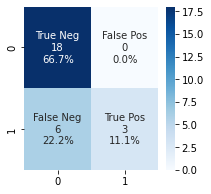

In [50]:
cf=confusion_matrix(y_test, y_pred)

#Viz of confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(3,3))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')
plt.savefig("results/RF_r100M_taxa_PAV_linear_growth.png", dpi=600, bbox_inches="tight")

In [51]:
## 6 Feature importance
# Extract feature importances
importances = rf_model.feature_importances_

# Match with feature names
feature_importances = pd.DataFrame({
    'Feature': otu_dr4.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(100))

                                     Feature  Importance
1470               s__Prevotella sp022741625    0.016388
1759            s__Streptococcus sp000187445    0.016345
931   s__Faecalibacterium_genus_unkn_species    0.014004
1104            s__Helicobacter_B fennelliae    0.012403
1754             s__Streptococcus salivarius    0.010526
...                                      ...         ...
40              s__Agathobaculum sp003481705    0.002841
29               s__Agathobacter sp900546625    0.002800
1743        s__Streptococcus parasanguinis_H    0.002723
242                    s__Blautia_A wexlerae    0.002640
1187                s__Lachnospira eligens_A    0.002618

[100 rows x 2 columns]


In [52]:
# export results
feature_importances.to_csv('results/r100M_taxa_PAV_linear_growth.csv', index=False)